In [67]:
# 🧪 Model Exploration Notebook

#This notebook was used for early testing and prototyping of pollution prediction using SO₂ and NO₂.  
#Final training and evaluation are documented in `WEEK2/week2_model_training.ipynb`.  
#This file is retained for transparency and experimentation.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(".."))  # Adds project root to Python path
sys.path.append(os.path.abspath("."))  # Adds current directory to Python path


In [70]:
df = pd.read_csv('../main data/data.csv', encoding='ISO-8859-1')
df.head()


C:\Users\rajgh\AppData\Local\Temp\ipykernel_15412\4071636661.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../main data/data.csv', encoding='ISO-8859-1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
#from src/drift_model.py

from src.drift_model import train_model, make_predictions
from sklearn.model_selection import train_test_split

# Select features and target
X = df[['wind_speed', 'humidity']]  # Add 'wind_angle' if you've created it
y = df['particulate_level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


model = train_model(X_train, y_train)
predictions = make_predictions(model, X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")


R² Score: nan
MAE: 15.10
MSE: 228.01


d:\RAJ\GITHUB_REPOSITORY\Pollution-Drift-Predictor\venv\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
print(len(y_test))

print(f"Total samples: {len(X)}")



1
Total samples: 2


In [ ]:
error_percent = (mae / y_test.mean()) * 100
print(f"Error Percentage: {error_percent:.2f}%")


Error Percentage: 21.54%


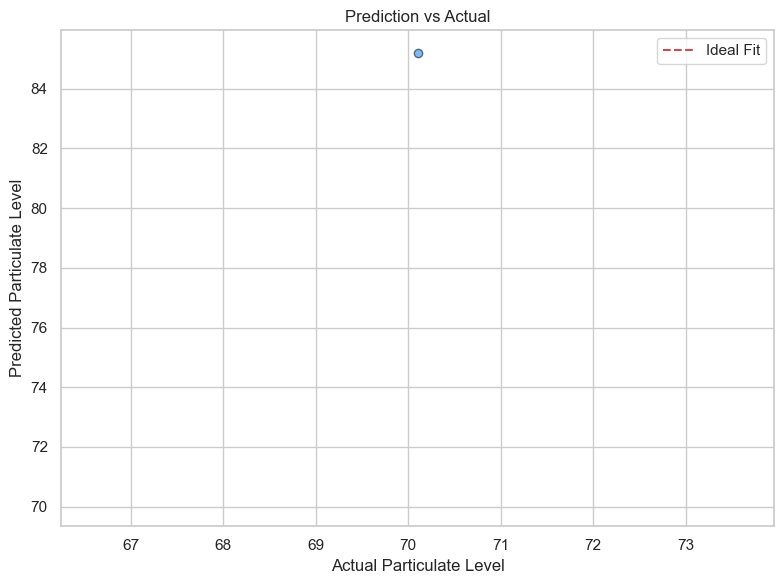

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6, color='dodgerblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Particulate Level")
plt.ylabel("Predicted Particulate Level")
plt.title("Prediction vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from src.data_ingestion import load_data, preprocess_data

df = load_data('../main data/data.csv')
df = preprocess_data(df)
df.head()


,site_name,wind_speed,wind_direction,particulate_level,humidity,timestamp,wind_angle
0,Site A,12.5,NW,85.2,60,2025-08-28 18:00,315
1,Site B,8.3,SE,70.1,55,2025-08-28 19:00,135


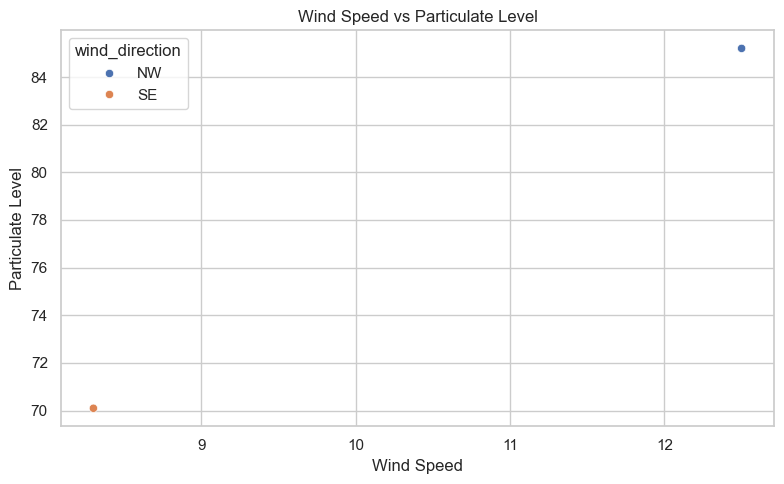

In [ ]:
from src.Visualizer import plot_drift

plot_drift(df)
